resized image shape: (2, 2, 3)
[0 1 2 3]
[[0.08627451 0.05882353 0.27843137]
 [0.28235294 0.45882353 0.00392157]
 [0.09411765 0.10588235 0.43529412]
 [0.40784314 0.4        0.02745098]]


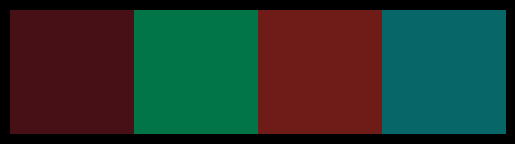

In [3]:
from hierarhical_clustering import hierarchical_lance_williams as clustering
import cv2
import numpy as np
import matplotlib.pyplot as plt


max_pixels = 2000

def resize_image(image):
    width, height = image.shape[:2]
    ratio = 1
    if width * height > max_pixels:
        ratio = max_pixels / (width * height)
    return cv2.resize(image, (0, 0), fx=ratio, fy=ratio)

def reverse_rgb(rgb_arr):
    return np.array([rgb_arr[:, 2], rgb_arr[:, 1], rgb_arr[:, 0]]).T

def centers_from_labels(labels, X):
    centers = []
    for i in range(len(np.unique(labels))):
        centers.append(np.mean(X[labels == i], axis=0))
    return np.array(centers)

def get_dominating_colors(image, k):
    image = resize_image(image)
    image = image / 255
    print("resized image shape:", image.shape)
    labels, padre = clustering(image.reshape(-1, 3), k)
    print(np.unique(labels))
    return centers_from_labels(labels, image.reshape(-1, 3))

def plot_dominating_colors(colors):
    colors = reverse_rgb(colors)
    plt.imshow([colors])
    plt.axis('off')
    plt.show()
    
    
if __name__ == '__main__':
    image_path = '../data/afghan_girl.jpg'
    
    image = cv2.imread(image_path)
    colors = get_dominating_colors(image, 10)
    print(colors)
    plot_dominating_colors(colors)
